In [2]:
import os
if os.getcwd() == '/home/user/code':
    os.chdir('/home/user/code/nlp2024_ClefTask4SOTA')

%load_ext autoreload
%autoreload 2

In [2]:
from src.dataset import TDMSDataset, PATH

dataset = TDMSDataset(PATH.TRAIN)

# Where can a doctaet be extracted?

In [3]:
from src.content_extraction import all_sections

results = []
for i in range(len(dataset)):
    f, tex, jsn = dataset[i]
    sections = all_sections(tex)
    results.append({"f": f, "sections": sections})

In [4]:
import pandas as pd

df = pd.DataFrame(results)

In [7]:
sections = df["sections"][0]
prop = ["Bla", "Test"]


False

In [8]:

def has_prop(sections, prop):
    sections = dict(sections)
    return prop in sections.keys()

def any_section_experiment_result(sections):
    return any(["experiment" in k.lower() or "result" in k.lower() for k, _ in sections])

df["has_title"] = df["sections"].apply(lambda c: has_prop(c, "title"))
df["has_abstract"] = df["sections"].apply(lambda c: has_prop(c, "abstract"))
df["has_table"] = df["sections"].apply(lambda c: has_prop(c, "table"))
df["has_results_experiments"] = df["sections"].apply(lambda c: any_section_experiment_result(c))

In [20]:
df.groupby("has_results_experiments").count()
# 4691 have no results / experiment, 7597 have

,f,sections,has_title,has_abstract,has_table,no_doctaet
has_results_experiments,,,,,,
False,4691,4691,4691,4691,4691,4691
True,7597,7597,7597,7597,7597,7597


In [16]:
df["no_doctaet"] = df.apply(lambda row: not any([row["has_title"], row["has_abstract"], row["has_table"], row["has_results_experiments"]]), axis=1)

In [19]:
df.groupby("no_doctaet").count()

# 10929 contain any doctaet info, 1359 contain none at all

,f,sections,has_title,has_abstract,has_table,has_results_experiments
no_doctaet,,,,,,
False,10929,10929,10929,10929,10929,10929
True,1359,1359,1359,1359,1359,1359


# Naive Doctaet

In [4]:
from src.content_extraction import naive_doctaet

doctaets = []
for i in range(len(dataset)):
    f, tex, jsn = dataset[i]
    doctaet = naive_doctaet(tex)
    doctaets.append({"f": f, "doctaet": doctaet})

<Axes: ylabel='Density'>

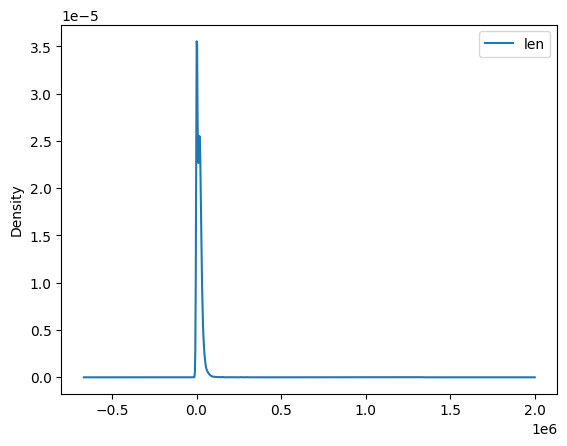

In [5]:
import pandas as pd
df = pd.DataFrame(doctaets)
df["len"] = df["doctaet"].str.len()
df = df.sort_values("len", ascending=False)
df.plot(kind="kde")


# How many tokens are necessary for DocTAET?

In [9]:
from transformers import AutoModelForCausalLM, AutoTokenizer
model = "meta-llama/Meta-Llama-3-8B"
tokenizer = AutoTokenizer.from_pretrained(model)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [18]:

def token_len(text):
    return len(tokenizer(text)["input_ids"])

df["token_len"] = df["doctaet"].apply(token_len)


<Axes: >

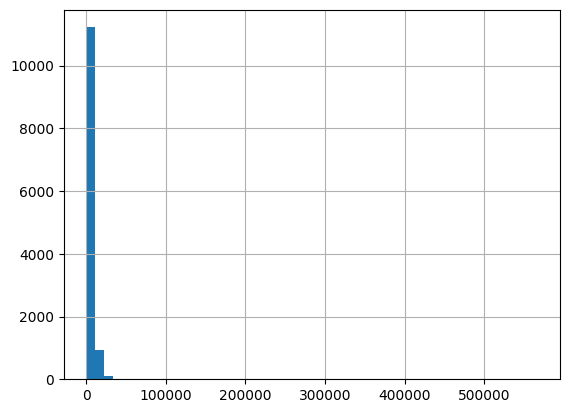

In [22]:
df["token_len"].hist(bins=50)

In [28]:
df["gt_8192"] = df["token_len"] > 8192
df.groupby("gt_8192").count()

,f,doctaet,len,token_len
gt_8192,,,,
False,9920,9920,9920,9920
True,2368,2368,2368,2368
